## How can we group the good grains.. Which wheat is good to buy...

Wheat can be classified in three ways:

Colour (e.g., red, yellow, white)

Planting season: spring wheat, planted in the spring and harvested in early fall; winter wheat, planted in the fall, harvested the following summer

Characteristics of the grain: durum, hard bread wheat, and soft wheat

In Canada, hard spring wheat suitable for yeast products is grown on the Prairies. In southern Alberta, where winters are not as severe, some hard winter wheat is grown. Irrigated land in Alberta also produces some white soft winter wheat. The main soft white winter wheat growing area is southern Ontario.

Now let us see thd data of the wheat , try to have the groups of wheat which are similar to each other based on multople features.

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for the experiment. 

High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. 

The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin. 



How we can help identify the similar wheat..

### Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured: 
1. area A, 
2. perimeter P, 
3. compactness C = 4*pi*A/P^2, 
4. length of kernel, 
5. width of kernel, 
6. asymmetry coefficient 
7. length of kernel groove. 
All of these parameters were real-valued continuous.

### Step 1: 
Load the dataset 

In [1]:
import pandas as pd

seeds_df = pd.read_csv('seeds.csv')

varieties = seeds_df['grain_variety']
# forget about the grain variety for the moment - we'll use this later
del seeds_df['grain_variety']

### Step 2: 
Display the DataFrame to inspect the data. Notice that there are 7 columns 
so each grain sample (row) is a point in 7D space! Scatter plots can't help us here.



In [2]:
seeds_df

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.2210,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.0180,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.6990,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.2590,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.3550,5.175
5,14.38,14.21,0.8951,5.386,3.312,2.4620,4.956
6,14.69,14.49,0.8799,5.563,3.259,3.5860,5.219
7,14.11,14.10,0.8911,5.420,3.302,2.7000,5.000
8,16.63,15.46,0.8747,6.053,3.465,2.0400,5.877
9,16.44,15.25,0.8880,5.884,3.505,1.9690,5.533


### Step 3: 
Extract the measurements from the DataFrame using its .values attribute:

In [3]:
samples = seeds_df.values

### Step 4: 

Measure the quality of clusterings with different numbers of clusters using the inertia. For each of the given values of k, perform the following steps:

Create a KMeans instance called model with k clusters.

Fit the model to the grain data samples.

Append the value of the inertia_ attribute of model to the list inertias.

In [4]:
from sklearn.cluster import KMeans

ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(samples)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

### Step 5: 
Plot the inertia to see which number of clusters is best. Remember: lower numbers are better!

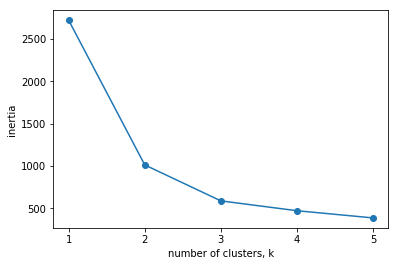

In [5]:
import matplotlib.pyplot as plt
% matplotlib inline
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

You can see from the graph that 3 is a good number of clusters, since these are points where the elbow begins 

Now let us do the Kmeans with 3 clusters

In [6]:
model = KMeans(n_clusters=3)

Derive the cluster labels.


In [7]:
labels = model.fit_predict(samples)

Count the number of times each grain variety coincides with each cluster label.

In [8]:
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,0,1,60
1,2,60,10
2,68,9,0


To implement the vizualization we need to have PCA of data to 2 dimention then only we can see in 2 D